In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("credit_data1.csv", sep=";", encoding = 'latin_1')


In [4]:
df.head()


,clientid,income,sexo,Produto,age,loan,default,tempo
0,1,66156,1,prodA,59.0,8107,0,10
1,2,34415,1,prodA,48.0,6565,0,10
2,3,57317,1,prodA,63.0,8021,0,9
3,4,42710,1,prodA,46.0,6104,0,8
4,5,66953,1,prodA,19.0,8770,1,8


In [5]:
df.describe()


,clientid,income,sexo,age,loan,default,tempo
count,2000.000000,2000.0000,2000.000000,1997.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.6145,1.511500,40.813220,4444.375000,0.141500,14.920500
std,577.494589,14326.3254,0.499993,13.632805,3045.414708,0.348624,16.340155
min,1.000000,20014.0000,1.000000,-52.000000,1.000000,0.000000,0.000000
25%,500.750000,32796.5000,1.000000,29.000000,1940.000000,0.000000,4.000000
50%,1000.500000,45789.0000,2.000000,41.000000,3974.500000,0.000000,8.000000
75%,1500.250000,57791.5000,2.000000,53.000000,6432.750000,0.000000,19.000000
max,2000.000000,69996.0000,2.000000,64.000000,13766.000000,1.000000,60.000000


In [6]:
type(df['age'].loc(0))

pandas.core.indexing._LocIndexer

In [7]:
df.loc[df['age'] < 0]

,clientid,income,sexo,Produto,age,loan,default,tempo
15,16,50502,1,prodA,-28.0,3977,0,9
21,22,32198,1,prodA,-52.0,4244,0,4
26,27,63287,1,prodA,-37.0,9595,0,10


In [8]:
# preencher os valores com a média
df.mean()
df['age'].mean()
df['age'][df.age > 0].mean()
df.loc[df.age < 0, 'age'] = 40.92

df.loc[df['age'] < 0]

,clientid,income,sexo,Produto,age,loan,default,tempo


In [9]:
## Verificar se tem missing 
df.isnull().sum()

clientid    0
income      0
sexo        0
Produto     0
age         3
loan        0
default     0
tempo       0
dtype: int64

In [10]:
# selecionar missing
df[df['age'].isnull()]

,clientid,income,sexo,Produto,age,loan,default,tempo
28,29,59418,1,prodA,NaN,2083,0,10
30,31,48529,1,prodA,NaN,6156,0,3
31,32,23526,1,prodA,NaN,2862,0,4


In [11]:
df['age'].mean()

40.93327991987982

In [12]:
#preencher dados com a média
df['age']=df['age'].fillna(value=df['age'].mean())

In [13]:
#validação
df.loc[df['clientid'] ==29 ]

,clientid,income,sexo,Produto,age,loan,default,tempo
28,29,59418,1,prodA,40.93328,2083,0,10


In [14]:
## Verificar se tem missing 
df.isnull().sum()

clientid    0
income      0
sexo        0
Produto     0
age         0
loan        0
default     0
tempo       0
dtype: int64

In [15]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [16]:
df_z= df.loc[:,['income','sexo','Produto','age','loan','tempo', 'default']]
df_z1=pd.get_dummies(df_z, drop_first=True)
df_z1.head(5)

,income,sexo,age,loan,tempo,default,Produto_prodB,Produto_prodC
0,66156,1,59.0,8107,10,0,0,0
1,34415,1,48.0,6565,10,0,0,0
2,57317,1,63.0,8021,9,0,0,0
3,42710,1,46.0,6104,8,0,0,0
4,66953,1,19.0,8770,8,1,0,0


In [17]:
## Escrever a formula como no R. 
formula = 'default ~ income+sexo+Produto_prodB+Produto_prodC+age+loan+tempo'

In [18]:
model = smf.glm(formula = formula, data=df_z1, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.397
Date:                Sun, 02 Feb 2020   Deviance:                       44.794
Time:                        13:29:57   Pearson chi2:                     184.
No. Iterations:                    25   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.6326    1.2e+04      0.002      0.998   -2.35e+04    2.36e+04
income           -0.0002   6.31e-05     -3.

In [290]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept        23.632560
income           -0.000205
sexo            -20.614983
Produto_prodB    -4.665630
Produto_prodC     9.704136
age              -0.346469
loan              0.001659
tempo             0.422568
dtype: float64

p-Values
Intercept        0.998430
income           0.001172
sexo             0.998631
Produto_prodB    0.417273
Produto_prodC    0.999355
age              0.000020
loan             0.000022
tempo            0.000013
dtype: float64

Dependent variables
default


In [19]:
## Tirar as variáveis irrelevantes 
formula = 'default ~ income+age+loan+tempo'

In [20]:
model = smf.glm(formula = formula, data=df_z1, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48.408
Date:                Sun, 02 Feb 2020   Deviance:                       96.816
Time:                        13:30:32   Pearson chi2:                     861.
No. Iterations:                    11   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9490      1.866      2.116      0.034       0.291       7.607
income        -0.0003   5.05e-05     -5.424      0.0

In [21]:
df_z['SCORE']=df_z['income']*(-0.0003)+df_z['age']*(-0.3551)+df_z['loan']*(0.0019) + df_z['tempo']*(0.2106) + 3.9490

In [22]:
df_z['SCORE'].min()

-36.082800000000006

In [23]:
df_z['SCORE_1']=round((np.exp(df_z['SCORE']) /(1+np.exp(df_z['SCORE'])))*1000,0)

In [25]:
df_z.head(10)

,income,sexo,Produto,age,loan,tempo,default,SCORE,SCORE_1
0,66156,1,prodA,59.0,8107,10,0,-19.3394,0.0
1,34415,1,prodA,48.0,6565,10,0,-8.8408,0.0
2,57317,1,prodA,63.0,8021,9,0,-18.4821,0.0
3,42710,1,prodA,46.0,6104,8,0,-11.9162,0.0
4,66953,1,prodA,19.0,8770,8,1,-4.5360,11.0
5,24904,1,prodA,57.0,16,9,0,-21.8371,0.0
6,48430,1,prodA,27.0,5723,8,0,-7.6092,0.0
7,24500,1,prodA,33.0,2971,52,1,1.4768,814.0
8,40655,1,prodA,56.0,4756,1,0,-18.8861,0.0
9,25076,1,prodA,40.0,1409,7,0,-13.6265,0.0


In [34]:
df_z['SCORE_1'].max()

1000.0

In [36]:
df_z['SCORE_1'].describe()

count    2000.000000
mean      132.985000
std       327.787949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: SCORE_1, dtype: float64

## quebras decis 


In [42]:
pd.qcut(range(5), 4)

[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

In [ ]:
df_z['SCORE_1'] investment_df['decile'] = pd.qcut(investment_df['investment'], 10, labels=False)

In [44]:
df_z.to_excel("output.xlsx")  

In [39]:
df_z.groupby(pd.qcut(df_z.SCORE_1, 10))['income'].sum()

ValueError: Bin edges must be unique: array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          1. ,  960.3, 1000. ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

# KS

In [46]:
## Ks
from scipy import stats
stats.ks_2samp(df_z['SCORE_1'], df_z['default'])

Ks_2sampResult(statistic=0.1995, pvalue=2.887162951462697e-35)

In [47]:
test=stats.ks_2samp(df_z['SCORE_1'], df_z['default'])

In [48]:
test[0]

0.1995

In [ ]:
stats.ks_2samp(df_z['SCORE_1'], df_z['default'])

In [337]:
inputData=df_z.loc[:,['income','loan','age','tempo']]
outputData=df_z.loc[:,['default']]


In [338]:
from sklearn.metrics import roc_curve

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [368]:
predictions = result.predict()
print(predictions[0:10])

[2.46421914e-08 3.81613673e-04 4.59772366e-08 2.18265077e-05
 6.37865603e-02 6.31014521e-10 1.87363241e-03 8.95625807e-01
 1.91649168e-08 2.36700598e-06]


In [369]:
predictions

array([2.46421914e-08, 3.81613673e-04, 4.59772366e-08, ...,
       9.73101609e-01, 9.76458394e-13, 8.82965136e-10])

In [347]:
pd.DataFrame(predictions).describe() 

,0
count,2.000000e+03
mean,1.415000e-01
std,3.389808e-01
min,1.114793e-15
25%,2.099054e-08
50%,3.192680e-06
75%,8.515533e-04
max,9.999999e-01


In [367]:
resposta=df_z.loc[:,['default']].values
resposta

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [363]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

auc = roc_auc_score(predictions, resposta)

ValueError: continuous format is not supported

AUC: 0.895


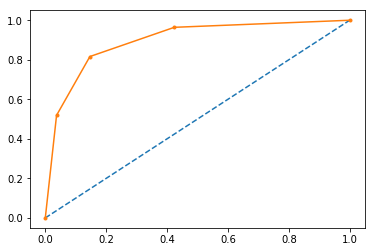

In [371]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [370]:
predictions

array([2.46421914e-08, 3.81613673e-04, 4.59772366e-08, ...,
       9.73101609e-01, 9.76458394e-13, 8.82965136e-10])

In [357]:
### http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.